In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

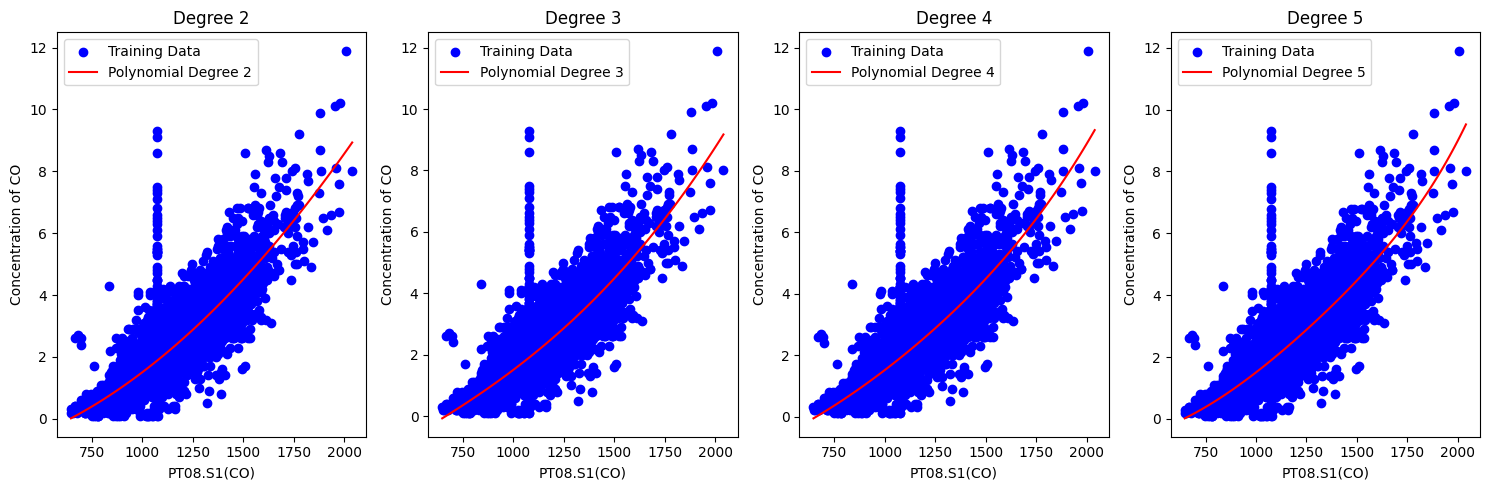

Best polynomial degree: 5
Test RMSE for best degree (5): 0.7307


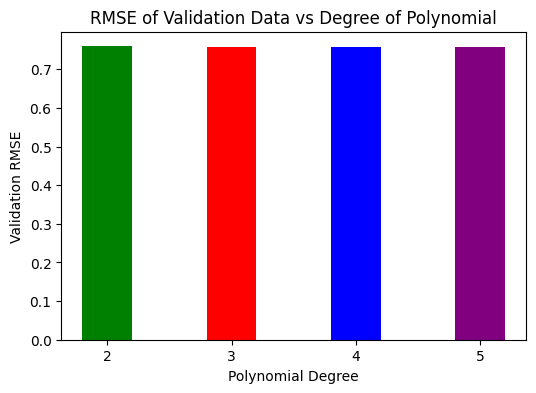

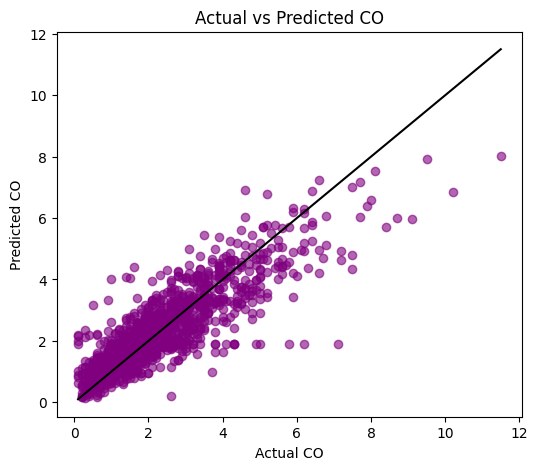

In [49]:
df=pd.read_csv('airquality_updated.csv')
X=df[['PT08.S1(CO)']].values
y=df['CO'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
train_rmse = []
val_rmse = []
degrees = [2, 3, 4, 5]

plt.figure(figsize=(15, 5))

for i, p in enumerate(degrees, 1):
    poly_features = PolynomialFeatures(degree=p)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)  
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_rmse.append(rmse_train)
    val_rmse.append(rmse_val)
    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_fit_poly = poly_features.transform(X_fit)
    y_fit = model.predict(X_fit_poly)
    plt.subplot(1, 4, i)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Degree {p}')
    plt.xlabel('PT08.S1(CO)')
    plt.ylabel('Concentration of CO')
    plt.legend()
    plt.title(f"Degree {p}")

plt.tight_layout()
plt.show()


best_degree = degrees[np.argmin(val_rmse)]
print(f"Best polynomial degree: {best_degree}")


best_poly = PolynomialFeatures(degree=best_degree)
X_train_best_poly = best_poly.fit_transform(X_train)
X_test_best_poly = best_poly.transform(X_test)

best_model = LinearRegression()
best_model.fit(X_train_best_poly, y_train)
y_test_pred = best_model.predict(X_test_best_poly)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE for best degree ({best_degree}): {rmse_test:.4f}")
colors=['green','red','blue', 'purple']
plt.figure(figsize=(6, 4))
plt.bar(degrees, val_rmse, color=colors, width=0.4,linewidth=5)
plt.xlabel("Polynomial Degree")
plt.ylabel("Validation RMSE")
plt.title("RMSE of Validation Data vs Degree of Polynomial")
plt.xticks(degrees)
plt.show()


plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel("Actual CO")
plt.ylabel("Predicted CO")
plt.title("Actual vs Predicted CO")
plt.show()
   